In [7]:
!which python

/Users/mdymshits/virtualenv/ir-threat/bin/python


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution1D, Flatten, BatchNormalization, Dropout
from keras import optimizers

In [9]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline


# Creating data
### Creating 1 batch of of the same ARMA

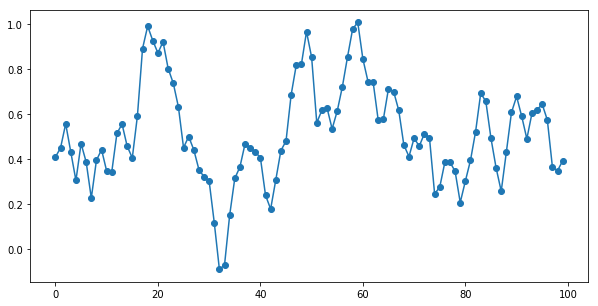

In [10]:



np.random.seed(123)
ar = np.array([.75, -.5])
ma = np.array([.25, .2])

ts = sm.tsa.arma_generate_sample(ar, ma, 100000)
ts = (ts + 2) / 4
plt.figure(figsize=(10,5))
plt.plot(ts[:100], marker='o');
ts_same = ts.reshape((1000, 100))

### Creating ARMA from different intialization

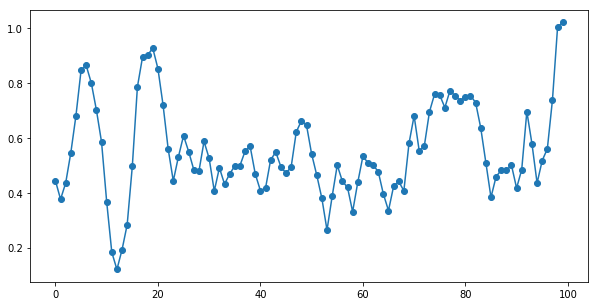

In [11]:

ts = []
np.random.seed(456)
for i in range(1000):

    ar = np.array([.75, -.5])
    ma = np.array([.25, .2])

    ts.append(sm.tsa.arma_generate_sample(ar, ma, 100))
    
ts_diff = np.array(ts)
ts_diff = (ts_diff + 2) / 4
plt.figure(figsize=(10,5))
plt.plot(ts_diff[0,:100], marker='o');

# Modeling
1-D Convolutional Network

In [12]:
def cnn_model(x_train, y_train, batch_size, epochs=500):
    
    
    input_dim = n_steps_for_train
    model = Sequential()
    model.add(Convolution1D(filters=6, kernel_size=4, input_shape=(input_dim ,1)))
    model.add(Flatten())
    model.add(Dense(units=64, kernel_initializer='normal'))
    # model.add(BatchNormalization())
    model.add(Activation('relu'))
    # model.add(Dropout(0.5))
    # model.add(Dense(units=60, actiivation='relu'))
    # model.add(Dense(units=40, activation='relu'))
    model.add(Dense(units=100-input_dim, activation='linear'))


    sgd = optimizers.SGD(lr=0.1)
    model.compile(loss='mean_squared_error',
                  optimizer='sgd',
                  metrics=['mae'])

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=.3, verbose=2)
    return model, history

```
n_steps_for_train = 60
n_samples = num_of_ts/2

x_train = data_numpy[:num_of_ts/2, :n_steps_for_train].reshape(n_samples, n_steps_for_train, 1) * 2000
y_train = data_numpy[:num_of_ts/2, n_steps_for_train:] * 2000

x_test = data_numpy[num_of_ts/2:, :n_steps_for_train].reshape(n_samples, n_steps_for_train, 1) * 2000
y_test = data_numpy[num_of_ts/2:, n_steps_for_train:] * 2000
```


In [13]:
n_samples = ts_same.shape[0]
n_steps_for_train = 75
x_train_same = ts_same[:n_samples/2, :n_steps_for_train].reshape(n_samples/2, n_steps_for_train, 1)
y_train_same = ts_same[:n_samples/2, n_steps_for_train:]

x_test_same = ts_same[n_samples/2:, :n_steps_for_train].reshape(n_samples/2, n_steps_for_train, 1)
y_test_same = ts_same[n_samples/2:, n_steps_for_train:]

model, history = cnn_model(x_train=x_train_same, y_train=y_train_same, batch_size=4)

Train on 350 samples, validate on 150 samples
Epoch 1/500
 - 0s - loss: 0.1924 - mean_absolute_error: 0.3669 - val_loss: 0.1008 - val_mean_absolute_error: 0.2603
Epoch 2/500
 - 0s - loss: 0.0720 - mean_absolute_error: 0.2170 - val_loss: 0.0525 - val_mean_absolute_error: 0.1835
Epoch 3/500
 - 0s - loss: 0.0470 - mean_absolute_error: 0.1742 - val_loss: 0.0430 - val_mean_absolute_error: 0.1651
Epoch 4/500
 - 0s - loss: 0.0423 - mean_absolute_error: 0.1654 - val_loss: 0.0411 - val_mean_absolute_error: 0.1613
Epoch 5/500
 - 0s - loss: 0.0412 - mean_absolute_error: 0.1631 - val_loss: 0.0407 - val_mean_absolute_error: 0.1604
Epoch 6/500
 - 0s - loss: 0.0408 - mean_absolute_error: 0.1623 - val_loss: 0.0405 - val_mean_absolute_error: 0.1599
Epoch 7/500
 - 0s - loss: 0.0404 - mean_absolute_error: 0.1613 - val_loss: 0.0402 - val_mean_absolute_error: 0.1594
Epoch 8/500
 - 0s - loss: 0.0402 - mean_absolute_error: 0.1609 - val_loss: 0.0399 - val_mean_absolute_error: 0.1587
Epoch 9/500
 - 0s - loss: 

Epoch 71/500
 - 0s - loss: 0.0361 - mean_absolute_error: 0.1524 - val_loss: 0.0370 - val_mean_absolute_error: 0.1528
Epoch 72/500
 - 0s - loss: 0.0361 - mean_absolute_error: 0.1523 - val_loss: 0.0369 - val_mean_absolute_error: 0.1528
Epoch 73/500
 - 0s - loss: 0.0360 - mean_absolute_error: 0.1523 - val_loss: 0.0369 - val_mean_absolute_error: 0.1527
Epoch 74/500
 - 0s - loss: 0.0360 - mean_absolute_error: 0.1522 - val_loss: 0.0369 - val_mean_absolute_error: 0.1525
Epoch 75/500
 - 0s - loss: 0.0360 - mean_absolute_error: 0.1519 - val_loss: 0.0369 - val_mean_absolute_error: 0.1524
Epoch 76/500
 - 0s - loss: 0.0360 - mean_absolute_error: 0.1521 - val_loss: 0.0368 - val_mean_absolute_error: 0.1523
Epoch 77/500
 - 0s - loss: 0.0359 - mean_absolute_error: 0.1518 - val_loss: 0.0368 - val_mean_absolute_error: 0.1523
Epoch 78/500
 - 0s - loss: 0.0360 - mean_absolute_error: 0.1519 - val_loss: 0.0368 - val_mean_absolute_error: 0.1524
Epoch 79/500
 - 0s - loss: 0.0359 - mean_absolute_error: 0.1520 

Epoch 141/500
 - 0s - loss: 0.0351 - mean_absolute_error: 0.1500 - val_loss: 0.0364 - val_mean_absolute_error: 0.1515
Epoch 142/500
 - 0s - loss: 0.0351 - mean_absolute_error: 0.1501 - val_loss: 0.0365 - val_mean_absolute_error: 0.1519
Epoch 143/500
 - 0s - loss: 0.0351 - mean_absolute_error: 0.1499 - val_loss: 0.0365 - val_mean_absolute_error: 0.1518
Epoch 144/500
 - 0s - loss: 0.0350 - mean_absolute_error: 0.1498 - val_loss: 0.0364 - val_mean_absolute_error: 0.1516
Epoch 145/500
 - 0s - loss: 0.0351 - mean_absolute_error: 0.1499 - val_loss: 0.0365 - val_mean_absolute_error: 0.1517
Epoch 146/500
 - 0s - loss: 0.0351 - mean_absolute_error: 0.1499 - val_loss: 0.0364 - val_mean_absolute_error: 0.1515
Epoch 147/500
 - 0s - loss: 0.0350 - mean_absolute_error: 0.1498 - val_loss: 0.0364 - val_mean_absolute_error: 0.1515
Epoch 148/500
 - 0s - loss: 0.0350 - mean_absolute_error: 0.1500 - val_loss: 0.0364 - val_mean_absolute_error: 0.1515
Epoch 149/500
 - 0s - loss: 0.0350 - mean_absolute_error

Epoch 211/500
 - 0s - loss: 0.0346 - mean_absolute_error: 0.1487 - val_loss: 0.0364 - val_mean_absolute_error: 0.1515
Epoch 212/500
 - 0s - loss: 0.0345 - mean_absolute_error: 0.1487 - val_loss: 0.0364 - val_mean_absolute_error: 0.1514
Epoch 213/500
 - 0s - loss: 0.0346 - mean_absolute_error: 0.1488 - val_loss: 0.0364 - val_mean_absolute_error: 0.1517
Epoch 214/500
 - 0s - loss: 0.0345 - mean_absolute_error: 0.1487 - val_loss: 0.0363 - val_mean_absolute_error: 0.1512
Epoch 215/500
 - 0s - loss: 0.0345 - mean_absolute_error: 0.1486 - val_loss: 0.0364 - val_mean_absolute_error: 0.1514
Epoch 216/500
 - 0s - loss: 0.0345 - mean_absolute_error: 0.1485 - val_loss: 0.0364 - val_mean_absolute_error: 0.1516
Epoch 217/500
 - 0s - loss: 0.0345 - mean_absolute_error: 0.1486 - val_loss: 0.0365 - val_mean_absolute_error: 0.1519
Epoch 218/500
 - 0s - loss: 0.0345 - mean_absolute_error: 0.1486 - val_loss: 0.0365 - val_mean_absolute_error: 0.1518
Epoch 219/500
 - 0s - loss: 0.0345 - mean_absolute_error

Epoch 281/500
 - 0s - loss: 0.0341 - mean_absolute_error: 0.1477 - val_loss: 0.0364 - val_mean_absolute_error: 0.1515
Epoch 282/500
 - 0s - loss: 0.0341 - mean_absolute_error: 0.1476 - val_loss: 0.0363 - val_mean_absolute_error: 0.1512
Epoch 283/500
 - 0s - loss: 0.0341 - mean_absolute_error: 0.1477 - val_loss: 0.0363 - val_mean_absolute_error: 0.1513
Epoch 284/500
 - 0s - loss: 0.0341 - mean_absolute_error: 0.1476 - val_loss: 0.0364 - val_mean_absolute_error: 0.1514
Epoch 285/500
 - 0s - loss: 0.0341 - mean_absolute_error: 0.1476 - val_loss: 0.0363 - val_mean_absolute_error: 0.1514
Epoch 286/500
 - 0s - loss: 0.0340 - mean_absolute_error: 0.1475 - val_loss: 0.0368 - val_mean_absolute_error: 0.1525
Epoch 287/500
 - 0s - loss: 0.0341 - mean_absolute_error: 0.1476 - val_loss: 0.0365 - val_mean_absolute_error: 0.1518
Epoch 288/500
 - 0s - loss: 0.0340 - mean_absolute_error: 0.1473 - val_loss: 0.0366 - val_mean_absolute_error: 0.1519
Epoch 289/500
 - 0s - loss: 0.0341 - mean_absolute_error

Epoch 351/500
 - 0s - loss: 0.0337 - mean_absolute_error: 0.1467 - val_loss: 0.0364 - val_mean_absolute_error: 0.1513
Epoch 352/500
 - 0s - loss: 0.0337 - mean_absolute_error: 0.1469 - val_loss: 0.0365 - val_mean_absolute_error: 0.1516
Epoch 353/500
 - 0s - loss: 0.0337 - mean_absolute_error: 0.1467 - val_loss: 0.0367 - val_mean_absolute_error: 0.1524
Epoch 354/500
 - 0s - loss: 0.0337 - mean_absolute_error: 0.1468 - val_loss: 0.0365 - val_mean_absolute_error: 0.1515
Epoch 355/500
 - 0s - loss: 0.0337 - mean_absolute_error: 0.1468 - val_loss: 0.0363 - val_mean_absolute_error: 0.1512
Epoch 356/500
 - 0s - loss: 0.0337 - mean_absolute_error: 0.1466 - val_loss: 0.0365 - val_mean_absolute_error: 0.1516
Epoch 357/500
 - 0s - loss: 0.0336 - mean_absolute_error: 0.1466 - val_loss: 0.0369 - val_mean_absolute_error: 0.1525
Epoch 358/500
 - 0s - loss: 0.0337 - mean_absolute_error: 0.1466 - val_loss: 0.0365 - val_mean_absolute_error: 0.1519
Epoch 359/500
 - 0s - loss: 0.0337 - mean_absolute_error

Epoch 421/500
 - 0s - loss: 0.0333 - mean_absolute_error: 0.1459 - val_loss: 0.0365 - val_mean_absolute_error: 0.1516
Epoch 422/500
 - 0s - loss: 0.0333 - mean_absolute_error: 0.1457 - val_loss: 0.0367 - val_mean_absolute_error: 0.1522
Epoch 423/500
 - 0s - loss: 0.0332 - mean_absolute_error: 0.1454 - val_loss: 0.0364 - val_mean_absolute_error: 0.1516
Epoch 424/500
 - 0s - loss: 0.0333 - mean_absolute_error: 0.1457 - val_loss: 0.0365 - val_mean_absolute_error: 0.1516
Epoch 425/500
 - 0s - loss: 0.0333 - mean_absolute_error: 0.1456 - val_loss: 0.0364 - val_mean_absolute_error: 0.1514
Epoch 426/500
 - 0s - loss: 0.0332 - mean_absolute_error: 0.1457 - val_loss: 0.0368 - val_mean_absolute_error: 0.1525
Epoch 427/500
 - 0s - loss: 0.0333 - mean_absolute_error: 0.1457 - val_loss: 0.0364 - val_mean_absolute_error: 0.1514
Epoch 428/500
 - 0s - loss: 0.0333 - mean_absolute_error: 0.1457 - val_loss: 0.0364 - val_mean_absolute_error: 0.1515
Epoch 429/500
 - 0s - loss: 0.0332 - mean_absolute_error

Epoch 491/500
 - 0s - loss: 0.0329 - mean_absolute_error: 0.1447 - val_loss: 0.0367 - val_mean_absolute_error: 0.1520
Epoch 492/500
 - 0s - loss: 0.0329 - mean_absolute_error: 0.1446 - val_loss: 0.0365 - val_mean_absolute_error: 0.1515
Epoch 493/500
 - 0s - loss: 0.0328 - mean_absolute_error: 0.1445 - val_loss: 0.0365 - val_mean_absolute_error: 0.1515
Epoch 494/500
 - 0s - loss: 0.0329 - mean_absolute_error: 0.1447 - val_loss: 0.0368 - val_mean_absolute_error: 0.1522
Epoch 495/500
 - 0s - loss: 0.0329 - mean_absolute_error: 0.1447 - val_loss: 0.0365 - val_mean_absolute_error: 0.1515
Epoch 496/500
 - 0s - loss: 0.0329 - mean_absolute_error: 0.1448 - val_loss: 0.0368 - val_mean_absolute_error: 0.1524
Epoch 497/500
 - 0s - loss: 0.0329 - mean_absolute_error: 0.1446 - val_loss: 0.0367 - val_mean_absolute_error: 0.1516
Epoch 498/500
 - 0s - loss: 0.0329 - mean_absolute_error: 0.1448 - val_loss: 0.0366 - val_mean_absolute_error: 0.1518
Epoch 499/500
 - 0s - loss: 0.0328 - mean_absolute_error

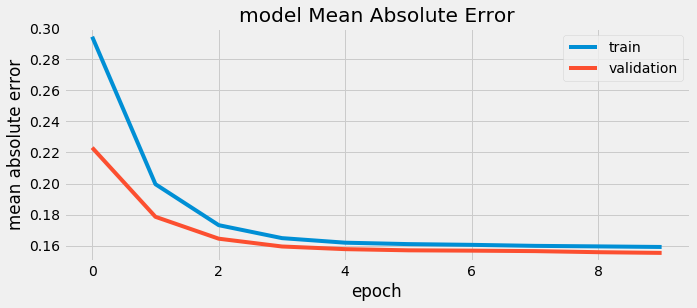

In [89]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 4))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
# plt.xlim(1,10)
plt.ylim(.15, .3)
plt.title('model Mean Absolute Error')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show();

```
y_pred_train = model.predict(x_train)

random_indexes = range(data.shape[1]/2)
random.shuffle(random_indexes)

for i in random_indexes[:5]:
    plt.figure()
    plt.plot(range(60), x_train[i], marker='o', markersize=3, label='input')
    plt.plot(range(60, 120), y_train[i], label='true')
    plt.plot(range(60, 120), y_pred_train[i], c='m', label='prediction')
    plt.title('train')
    plt.legend()
```

In [19]:
x_train_same[i].shape


(75, 1)

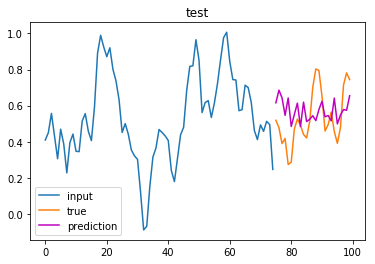

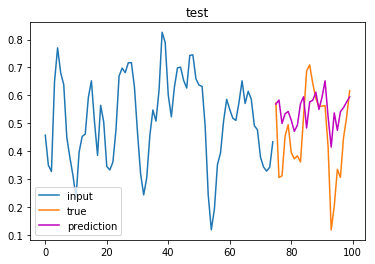

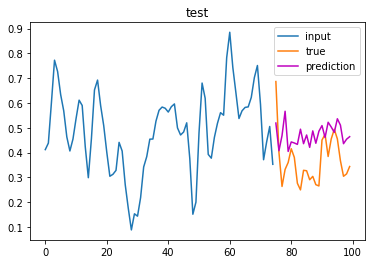

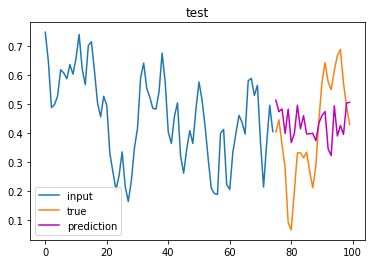

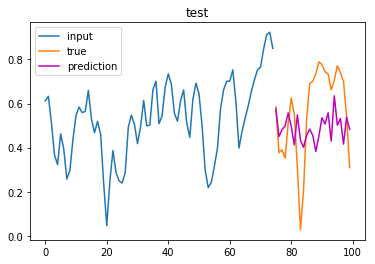

In [36]:
y_pred_test = model.predict(x_test_same)

for i in range(5):
    plt.figure()
    plt.plot(range(75), x_train_same[i], label='input')
    plt.plot(range(75, 100), y_test_same[i], label='true')
    plt.plot(range(75, 100), y_pred_test[i], c='m', label='prediction')
    plt.title('test')
    plt.legend()

## Comparing with Regular ARIMA


In [33]:
ts_same.shape

(1000, 100)

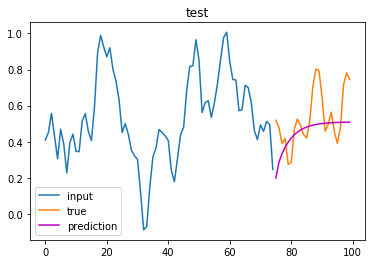

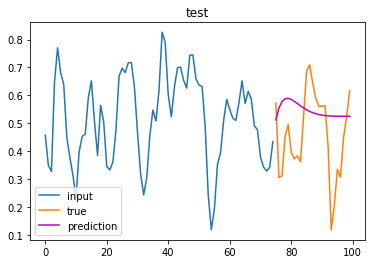

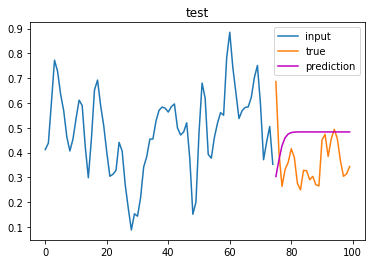

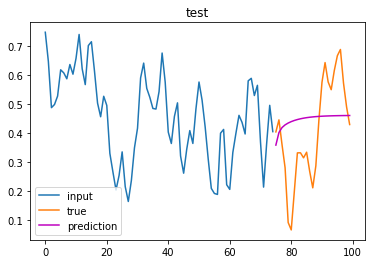

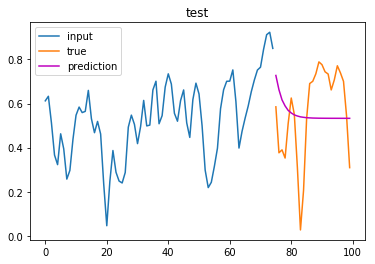

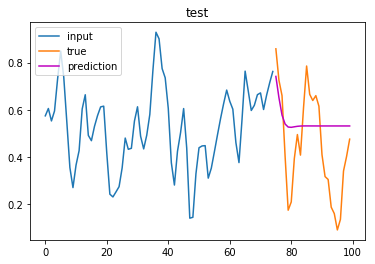

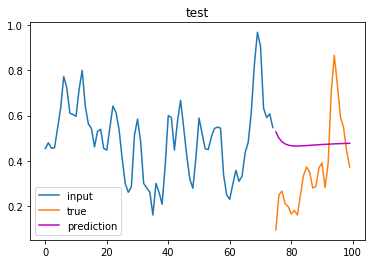

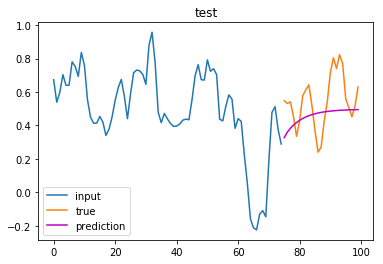

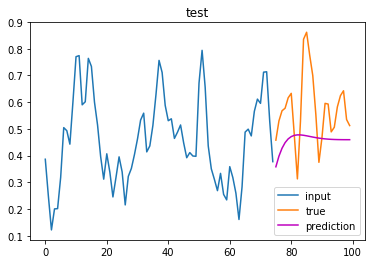

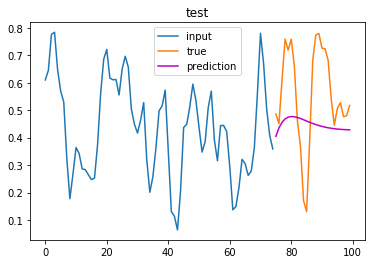

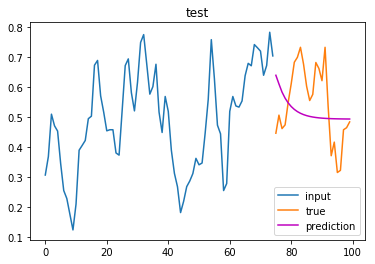

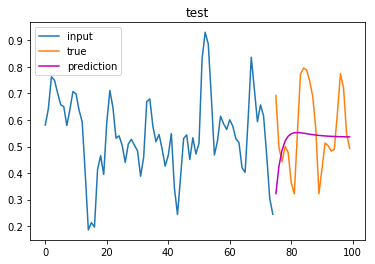

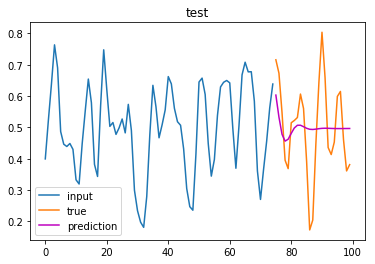

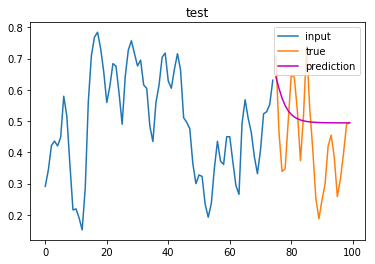

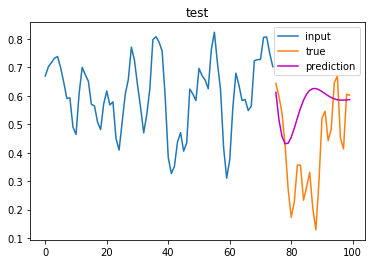

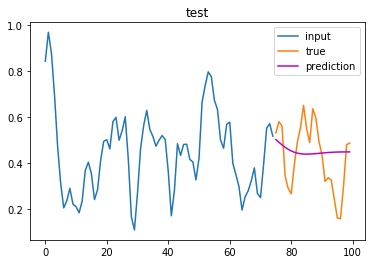

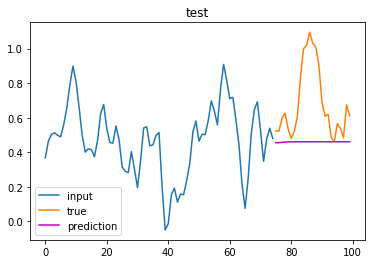

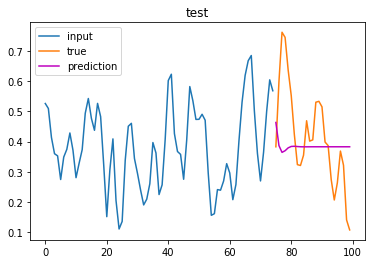

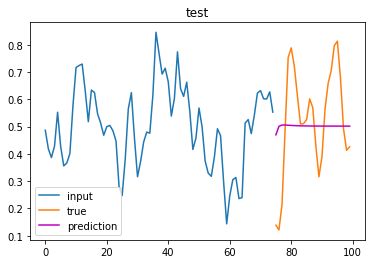

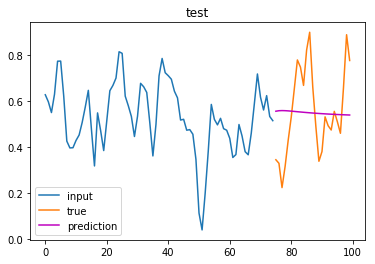

In [44]:
y_pred_test = model.predict(x_test_same)

for i in range(20):
    plt.figure()
    arma_res = sm.tsa.ARMA(x_train_same[i], order=(2,2)).fit()
    preds, stderr, ci = arma_res.forecast(25)
    plt.plot(range(75), x_train_same[i], label='input')
    plt.plot(range(75, 100), y_test_same[i], label='true')
    plt.plot(range(75, 100), preds, c='m', label='prediction')
    plt.title('test')
    plt.legend()